In [1]:
from IPython.display import YouTubeVideo  


# Como podemos definir Machine Learning ?

Machine Learning (ML) pode ser interpretado de várias formas, uma delas é incorporar a capacidade humana de aprendizagem para um programa estruturado e artificial.

## Categorias de Machine Learning
![Machine Learning Types](https://miro.medium.com/max/1398/1*FUZS9K4JPqzfXDcC83BQTw.png)

ML pode ser divido em 3 grandas áreas, Aprendizado Não-Supervisionado (Unsupervised Learning, UL), Aprendizado Supervisionado (Supervised Learning, SL) e Aprendizado Reforçado (Reinforced Learning, RL). 

Para este workshop não iremos tocar em Aprendizado Reforçado, pois é uma área menos amadurecida e com implementações mais complexas.

Alguns exemplos de cada tipo de aprendizado podem ser encontrados nas próximas células

## Vídeo Aprendizado Supervisionado

Algoritmos supervisionados envolvem uma espécie de "professor invisível" para o modelo, ou seja, o modelo tem um alvo específico que ele deve alcançar. 

Um exemplo bem famoso do mundo moderno é a identificação (em tempo quasi-real) de objetos. O vídeo abaixo mostra o sistema de reconhecimento de objetos e landscapes do seu piloto automático. 

Isto funciona treinando um modelo (normalmente *deep*, vamos tocar nisso depois) alimentado com imagens específicas (carros, árvores, prédios) e ele deve, sabendo que o alvo é acertar qual objeto aquela imagem contém, se adaptar de modo a aprender a processar e categorizar a imagem.

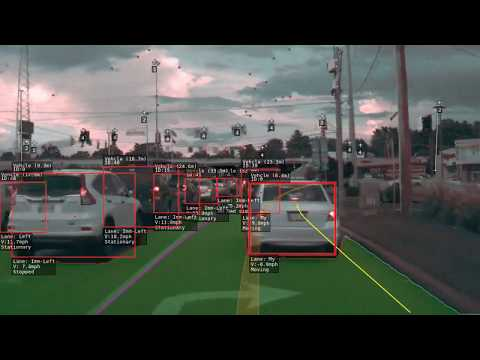

In [2]:
YouTubeVideo('7ztK5AhShqU')

## Vídeo Aprendizado Não-Supervisionado

Este vídeo fala por alto como funciona o sistema de recomendação da Netflix, que é fortemente baseado em algoritmos de **similaridade**, ou seja, clusterização.

Ele determina um perfil para cada usuário e cria uma "assinatura" daquele usuário, baseado no que este usuário vê, como ele faz o review, etc. E o coloca em um "espaço" onde é possível equiparar dois diferentes usuários de modo a tirar uma medida de similaridade.

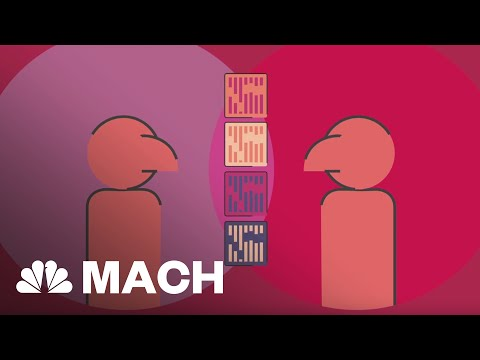

In [3]:
YouTubeVideo('nq2QtatuF7U')

## Vídeo Aprendizado Reforçado
Este exemplo é um que reforça (rsrs) a complexidade de um algoritmo de aprendizagem reforçada. Existem muitos outros de diferentes níveis de complexidade mas como este vídeo é muito bem explicado e se trata de um jogo clássico, acho que seria bastante válido a sua visualização.

Este algoritmo combina aprendizado reforçado com Redes Neurais (jájá faremos a nossa !) e algoritmos genéticos (evolutivos) além de rodar em tempo real.

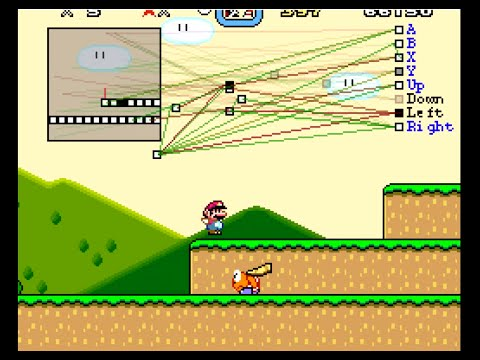

In [4]:
YouTubeVideo('qv6UVOQ0F44')


# Enfim, qual o plano para este workshop? 

*   Treinar 2 modelos de aprendizado supervisionado
  * Regressor
  * Classificador
*   Treinar 1 modelo de aprendizado não-supervisionado

# E quais dados vamos usar ?

Os dados de venda da animale, 
``` 
./data/animale.pkl
```

Que é uma __tupla__ que contém tabelas com as seguintes colunas

Coluna | Descrição
--- | ---
id_produto_cor | id do produto (único)
value | Valor total faturado
grade_total | Quantidade comprada
preco | Preco do produto
GiroArea | Area de Giro do produto (indicador de venda)
GiroClass | A categoria que o produto pertence (Bom, Ruim, Neutro)



In [ ]:
import pandas as pd
data = pd.read_pickle('./data/animale.pkl')
print(data[0].head())
print(data[1].head())



# O que é importante sabermos antes de continuar ?

Entender qual a essência de um modelo *supervisionado* e um modelo *não supervisionado*. Depois abriremos o *scope* para classificadores e regressores






## Modelo Supervisionado

Modelos supervisionados tem este nome devido à existência de um **alvo**. O que isto quer dizer? Quer dizer que no seu conjunto de dados, existe alguma informação que o modelo deve alcançar dado suas entradas. 

Tome por exemplo um tradutor, um modelo tradutor é treinado de maneira supervisionada utilizando frases préviamente traduzidas:

Entrada $(x)$= "I Like Machine Learning"

Alvo $(y)$= "Eu gosto de Aprendizado de Máquina"

Matematicamente falando, significa que o seu conjunto de dados pode ser traduzido como um **par** entrada-saída : $(x, y)$. O modelo vai processar esse par $(x, y)$ e retornar uma aproximação $\hat{y}$.

>![Supervised Learning Example](https://miro.medium.com/max/690/0*JH_V-umH_NVEipy2)

Modelos supervisionados requerem uma medida de **erro** ou **score** para conseguirem ser treinados. Métricas usuais de erro podem ser o Erro Quadrático Médio (MSE) ou Erro Absoluto Médio (MAE):

A partir do momento que você tem um alvo e uma saída do modelo, é possível definir alguma métrica de erro (ou performance) como:

\begin{equation}
\tag{MSE}
e = \frac{(y-\hat{y})^{2}}{2}
\end{equation}

\begin{equation}
\tag{MAE}
e = \frac{|(y-\hat{y})|}{2}
\end{equation}

### Exemplos de modelos supervisionados


*   Tradutor de idioma
*   Identificador de objetos
*   Aproximador de funções (entendimento de fenômenos complexos)
*   Preditor de séries temporais (vendas, preços, etc)






## Modelo Não-Supervisionado

O modelo não supervisionado não possui $\textbf{y}$, ele não tem alvo própriamente dito, ou seja, seu objetivo principal é fazer **agrupamentos**, produzir informação interpretável do comportamento dos seus dados. Um bom exemplo de modelo não supervisionado é o cerébro humano, capaz de separar objetos por características similares.

>![Unsupervised Learning Example](https://learn.g2.com/hs-fs/hubfs/unsupervised-learning.png?width=700&name=unsupervised-learning.png)

## Classificador & Regressor

Um modelo classificador deverá receber os dados e devolver uma classe, 0, 1, 2, etc. Ou seja, a variável alvo não é **contínua**, ela é **discreta**.

O regressor é um pouco mais complexo, ele pode ser encarado como um aproximador de funções. Ou seja, dado $y = f(x)$, o modelo regressor tentará "aprender" $f(\cdot)$, gerando uma função aproximada $\hat{f}(x)$, onde $\hat{y} = \hat{f}(x)$. Neste caso a sua variável alvo é **contínua**.

>![Unsupervised Learning Example](https://learn.g2.com/hs-fs/hubfs/classification-vs-regression.png?width=600&name=classification-vs-regression.png)

### Exemplo iterativo de classificador e regressor
> https://playground.tensorflow.org/

# Regressão Linear

A Regressão Linear é um modelo simples onde tentamos "fittar" (ajustar) os dados para uma reta (e eventualmente curvas) que melhor represente a nossa distribuição de pontos.

No Gif abaixo é possível ver como a reta vai se ajustando ao nosso conjunto de pontos a medida que as iterações vão passando.

![Linear Regression](https://miro.medium.com/max/640/1*eeIvlwkMNG1wSmj3FR6M2g.gif "Regressão Linear") 


In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt


# Reading data
data = pd.read_pickle('./data/animale.pkl')

# Inspecting the data
print(data.head())

# Defining the variables to be 'fed' to the model
# Tip: Slice the columns (DataFrame[columns])
X = 

# Defining the target variable
Y = 

# Training the model
model = 

# Evaluating the model
y_pred = 
score = 
print(score)
plt.figure('Model Performance')
plt.plot(y_pred, Y,'b.')
plt.plot(Y,Y,,'--k')

In [ ]:
#####################
##### CHALLENGE #####
#####################

# 1) This model has a HUGE flaw, making it unusable, can you spot it?

# 2) What can we change to improve our model ? (data-wise ONLY)

# 3) Can we guarantee that this model will work in production ? 
## If not, what can we do to ensure that ?

# Regressão Logística



A regressão Logística foi a primeira adaptação da regressão linear para um problema de classificação.

O regressor logístico utiliza uma transformação logistica (que é um pouco *math-heavy*, então não precisa se preocupar muito):
$
\begin{equation}
 h(x) = \frac{1}{(1-e^{\Theta^{T}}x)}
\end{equation}
$

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt


# Reading data
data = pd.read_pickle('./data/animale.pkl')

# Inspecting the data
print(data.head())

# Defining the variables to be 'fed' to the model
# Tip: Slice the columns (DataFrame[columns])
X = 

# Defining the target variable
# Tip: Use DataFrame.apply() to convert the continuous variable to categorical
Y = 

# Training the model
model = 

# Evaluating the model
y_pred = 
score = 
print(score)
print(confusion_matrix(Y, y_pred))


# *K-Means*

*K-Means* é um algoritmo de clusterização bastante utilizado por sua simplicidade.

Em suma, inicialmente posições aleatórias no espaço são escolhidas para o centro dos clusters. Depois, a partir de um critério de distância, todos os pontos são atribuídos à algum destes clusters. 
Dado essa distribuição de pontos por clusters, o centro de massa da distribuição é calculado e a posição central do cluster é atualizada. O processo se repete até a convergência.

Podemos reduzir este algoritmo à 2 passos (depois de definir a posição inicial dos centros dos clusters):

1.   Definir qual ponto pertence à qual cluster.
2.   Calcular a posição do centro do cluster como o centro de massa destes pontos.

![K-Means ><](https://media.giphy.com/media/12vVAGkaqHUqCQ/giphy.gif "Exemplo K-Means")


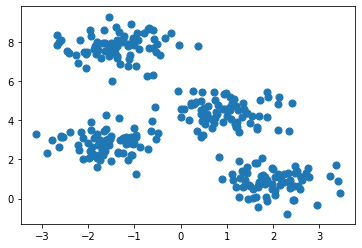

In [18]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

# Creating the dataset (completely artificial)
X, Y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)

# Visualizing the Data
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:

# Defining the variables to be 'fed' to the model
# Tip: Slice the columns (DataFrame[columns])
X = 

# Training the model (random_state = 0)
model = 


# Evaluating the model
Y_pred = 
score = 
print('ACCURACY:')
print('{}'.format(score*100))
plt.scatter(X[:, 0], X[:, 1], c=Y_pred, s=50, cmap='rainbow');

---------------
                                          ##### CHALLENGE #####
----------------

 1. Can you spot the main drawback of this algorithm ? (There are several, but one in special is known to be highly problematic)
 
 2. Can you tell why the accuracy is yield 0% hit rate ? Even though the plot shows a almost-perfect clustering ?